[[-0.21291114  0.69679411  1.24562066 ...  1.43317939 -0.0221473
   0.        ]
 [ 2.0506248   0.46684023  0.50622099 ... -0.64493073 -0.82872102
   1.        ]
 [ 0.69250324 -0.39510669  0.64705902 ... -1.26836376  0.24671061
   0.        ]
 ...
 [ 0.69250324  0.21998721  1.77376328 ...  1.43317939 -0.82872102
   0.        ]
 [-0.66561833 -0.45516085  0.38298771 ... -0.64493073 -0.55986311
   1.        ]
 [ 0.23979605  1.77086952  0.36538296 ... -0.43711971  0.24671061
   1.        ]]


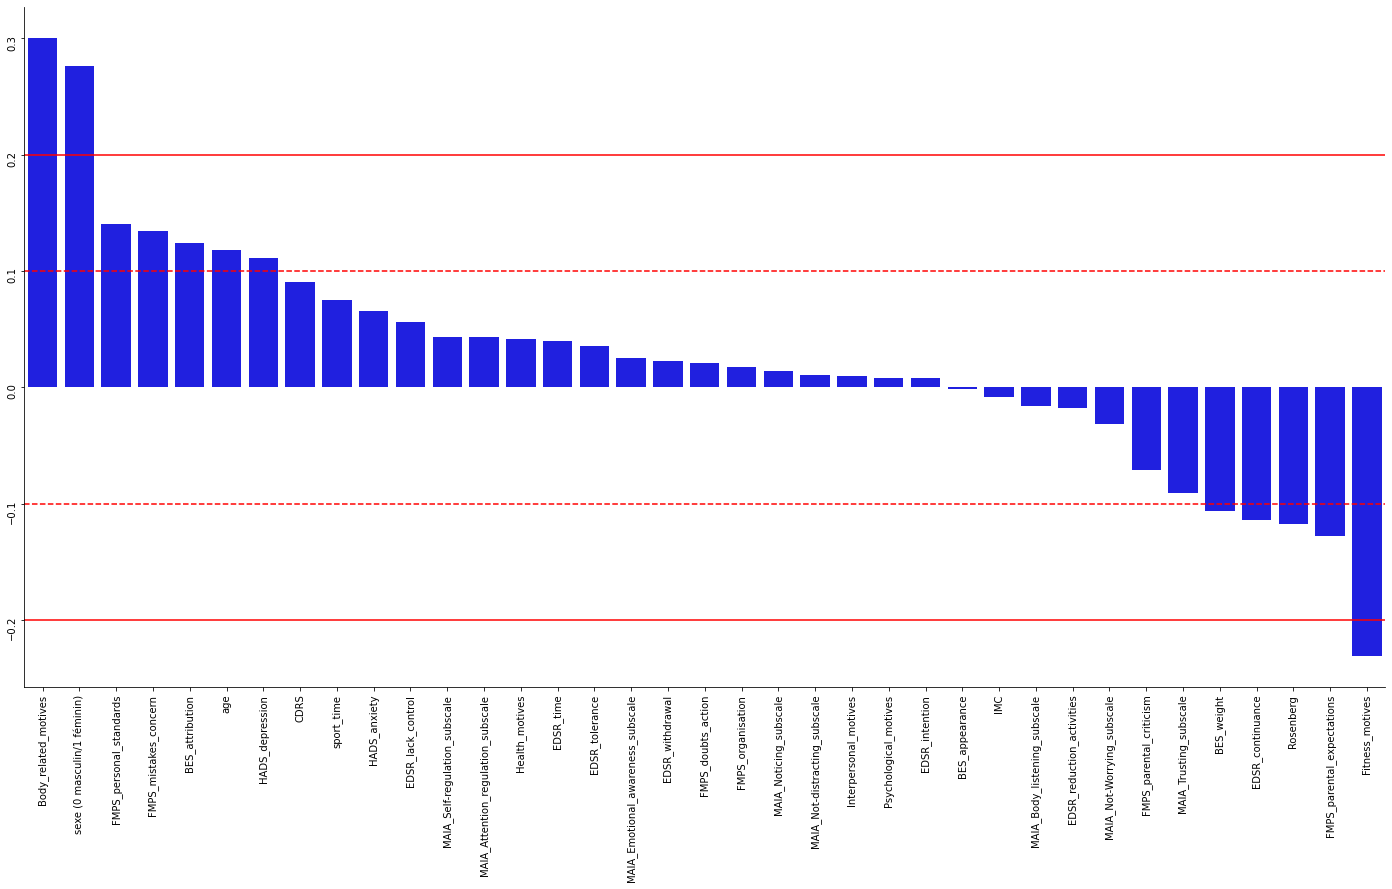

In [2]:
from sklearn.linear_model import RidgeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# From the NCV the best is a RidgeClassifier(alpha=10.0, class_weight='balanced', random_state=0)

#Import standardised data as a pandas Dataframe
df = pd.read_excel("Z:\\Documents\\Python\\_df\\APPETIT\\df_std_CL0.xlsx")

X_std = df.values

#print(X_std.shape)
print(X_std)

df_y = pd.read_excel("Z:\\Documents\\Python\\_df\\APPETIT\\df_std_CL0_20.xlsx")

y = np.ravel(df_y.values)

coefs = []
outer_cv = KFold(n_splits = 5, shuffle=True, random_state=1)
outer_cv.get_n_splits()
for train_index, test_index in outer_cv.split(X_std):
    X_train, X_test = X_std[train_index],X_std[test_index]
    Y_train, Y_test = y[train_index],y[test_index]
    clf = RidgeClassifier(alpha=10.0, class_weight='balanced', random_state=0)
    clf.fit(X_train, Y_train)
    coefs.append(np.squeeze(clf.coef_))

#print(np.mean(coefs, axis=0))

dff = pd.DataFrame(data=[np.mean(coefs, axis=0)], columns=df.columns)
#print(dff)
dff= dff.sort_values(by=[0], axis=1, ascending = False)
#print(dff)
#define a catplot with variable on axis X and value on axis Y for each different value in column "cluster" (hue="cluster") 
g = sns.catplot(height=10, aspect=2, color='blue', kind="bar", data=dff)

#Rotate the x ticks for 45 degrees
_ = plt.xticks(rotation=90)
_ = plt.yticks(rotation=90)
_ = plt.axhline(y=0.1,color='red', linestyle='--')
_ = plt.axhline(y=-0.1,color='red', linestyle='--')
_ = plt.axhline(y=0.2,color='red')
_ = plt.axhline(y=-0.2,color='red')

#show the plot
plt.show()


In [ ]:
#check significativity of coeficients 

#load data
#extract X and associated Y

#for loop 100*
    #permutation Y(random state = iteration number)
    #run ridge(X, permuted Y)
    #store_permuted_coeficients

#for loop each_variable
    #check if absolute value of original_coef is in percentil 5% of store_permuted_coeficients
    #print this check with its original coef if significative or 0 if not
    #store variable name with its original coef if significative or 0 if not

    

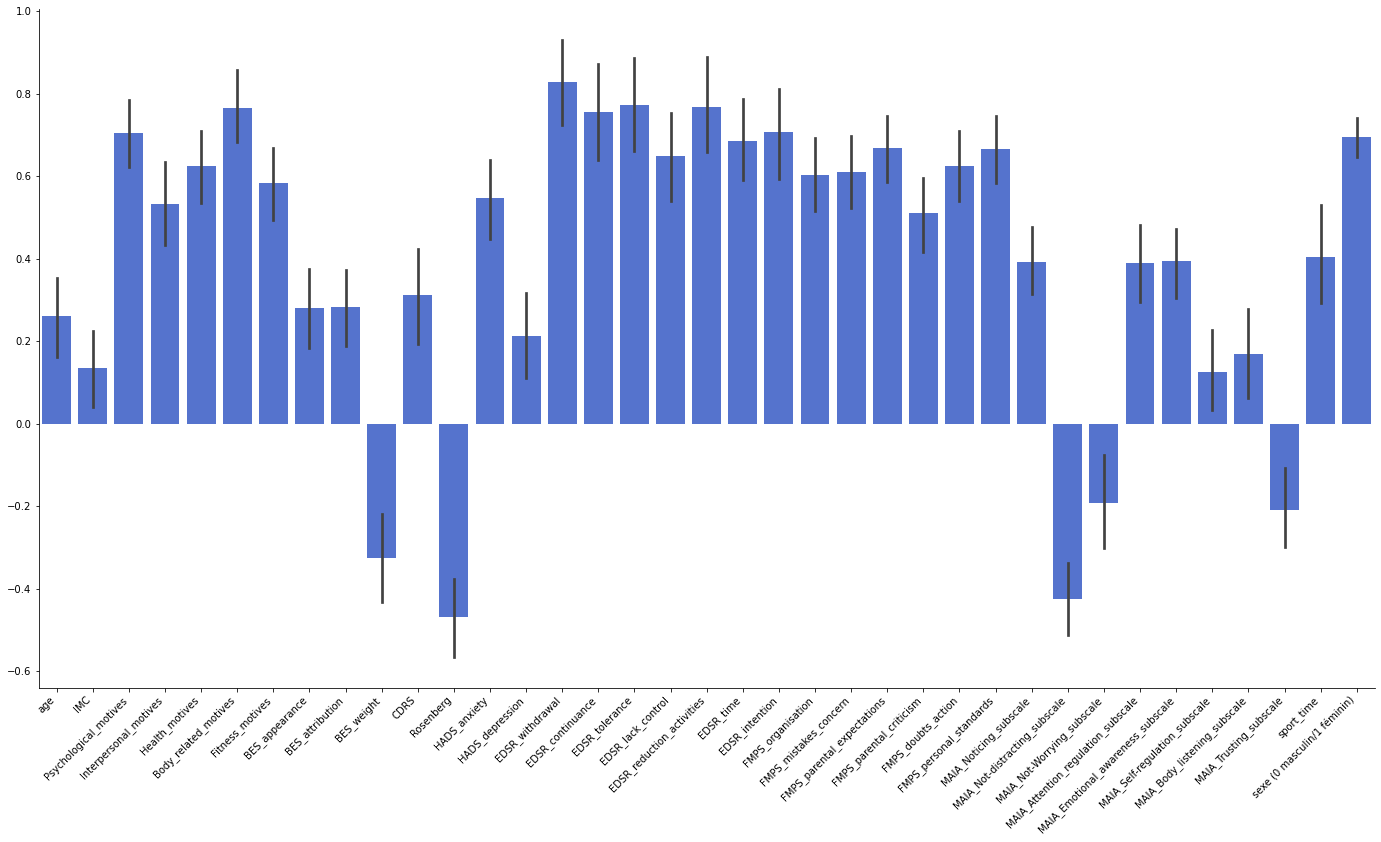

In [3]:
#Catplot with barplot (kind = bar)

g = sns.catplot(height=10, aspect=2, kind="bar", data=df, color = 'royalblue')

#Rotate the x ticks for 45 degrees
_ = plt.xticks(rotation=45, ha='right')

#show the plot
plt.show()

[ 0.3898863   0.14827758  0.1037532  -0.0901774   0.27068143  1.60719332
 -1.21405443 -0.21649786  0.52914628 -0.4094882   0.5151584  -0.65151961
  0.3464658   0.66710724 -0.08257504 -0.4824969   0.03011492  0.28105317
 -0.15999977  0.21587938  0.19489664  0.08949213  0.80048185 -0.78595963
 -0.43272605 -0.02286117  0.84357581  0.13467658  0.24466984 -0.18127452
 -0.07353368  0.25429461  0.258183   -0.05095328 -0.36996866  0.52805216
  1.54846757]


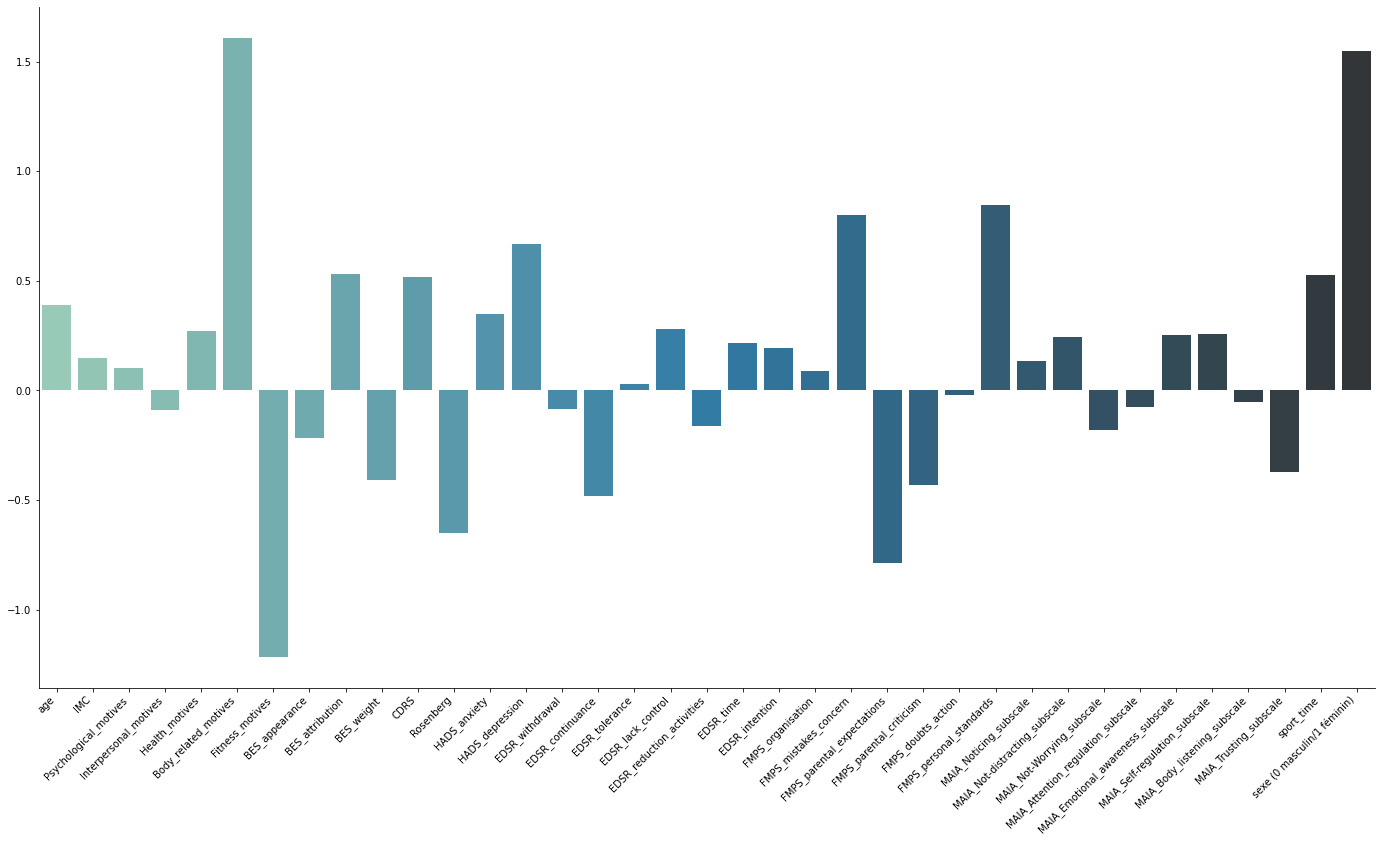

In [4]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# From the NCV the best is a LogisticRegression(C=10000.0, class_weight='balanced', max_iter=400, random_state=0)

#Import standardised data as a pandas Dataframe
df = pd.read_excel("Z:\\Documents\\Python\\_df\\APPETIT\\df_std_CL0.xlsx")

X_std = df.values

#print(X_std.shape)
#print(X_std)

df_y = pd.read_excel("Z:\\Documents\\Python\\_df\\APPETIT\\df_std_CL0_20.xlsx")

y = np.ravel(df_y.values)

coefs = []
outer_cv = KFold(n_splits = 4, shuffle=True, random_state=1)
outer_cv.get_n_splits()
for train_index, test_index in outer_cv.split(X_std):
    X_train, X_test = X_std[train_index],X_std[test_index]
    Y_train, Y_test = y[train_index],y[test_index]
    clf = LogisticRegression(C=10.0, class_weight='balanced', max_iter=200, random_state=0)
    clf.fit(X_train, Y_train)
    coefs.append(np.squeeze(clf.coef_))

print(np.mean(coefs, axis=0))

dff = pd.DataFrame(data=[np.mean(coefs, axis=0)], columns=df.columns)

#define a catplot with variable on axis X and value on axis Y for each different value in column "cluster" (hue="cluster") 
g = sns.catplot(capsize=.2, palette="YlGnBu_d", height=10, aspect=2, kind="bar", data=dff)

#Rotate the x ticks for 45 degrees
_ = plt.xticks(rotation=45, ha='right')

#show the plot
plt.show()


['age', 'IMC', 'Psychological_motives', 'Interpersonal_motives', 'Health_motives', 'Body_related_motives', 'Fitness_motives', 'BES_appearance', 'BES_attribution', 'BES_weight', 'CDRS', 'Rosenberg', 'HADS_anxiety', 'HADS_depression', 'EDSR_withdrawal', 'EDSR_continuance', 'EDSR_tolerance', 'EDSR_lack_control', 'EDSR_reduction_activities', 'EDSR_time', 'EDSR_intention', 'FMPS_organisation', 'FMPS_mistakes_concern', 'FMPS_parental_expectations', 'FMPS_parental_criticism', 'FMPS_doubts_action', 'FMPS_personal_standards', 'MAIA_Noticing_subscale', 'MAIA_Not-distracting_subscale', 'MAIA_Not-Worrying_subscale', 'MAIA_Attention_regulation_subscale', 'MAIA_Emotional_awareness_subscale', 'MAIA_Self-regulation_subscale', 'MAIA_Body_listening_subscale', 'MAIA_Trusting_subscale', 'sport_time', 'sexe (0 masculin/1 féminin)']


TypeError: set_ticks() got an unexpected keyword argument 'labels'

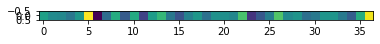

In [42]:
vegetables = ["Coefficients"]
farmers = ['age', 'IMC', 'Psychological_motives', 'Interpersonal_motives',
       'Health_motives', 'Body_related_motives', 'Fitness_motives',
       'BES_appearance', 'BES_attribution', 'BES_weight', 'CDRS', 'Rosenberg',
       'HADS_anxiety', 'HADS_depression', 'EDSR_withdrawal',
       'EDSR_continuance', 'EDSR_tolerance', 'EDSR_lack_control',
       'EDSR_reduction_activities', 'EDSR_time', 'EDSR_intention',
       'FMPS_organisation', 'FMPS_mistakes_concern',
       'FMPS_parental_expectations', 'FMPS_parental_criticism',
       'FMPS_doubts_action', 'FMPS_personal_standards',
       'MAIA_Noticing_subscale', 'MAIA_Not-distracting_subscale',
       'MAIA_Not-Worrying_subscale', 'MAIA_Attention_regulation_subscale',
       'MAIA_Emotional_awareness_subscale', 'MAIA_Self-regulation_subscale',
       'MAIA_Body_listening_subscale', 'MAIA_Trusting_subscale', 'sport_time',
       'sexe (0 masculin/1 féminin)']
print(farmers)
fig, ax = plt.subplots()
data=[np.mean(coefs, axis=0)]
im = ax.imshow(data)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Coefficient of the algorithm")
fig.tight_layout()
plt.show()

In [29]:
data=[np.mean(coefs, axis=0)]
print(data)

[array([ 0.3898863 ,  0.14827758,  0.1037532 , -0.0901774 ,  0.27068143,
        1.60719332, -1.21405443, -0.21649786,  0.52914628, -0.4094882 ,
        0.5151584 , -0.65151961,  0.3464658 ,  0.66710724, -0.08257504,
       -0.4824969 ,  0.03011492,  0.28105317, -0.15999977,  0.21587938,
        0.19489664,  0.08949213,  0.80048185, -0.78595963, -0.43272605,
       -0.02286117,  0.84357581,  0.13467658,  0.24466984, -0.18127452,
       -0.07353368,  0.25429461,  0.258183  , -0.05095328, -0.36996866,
        0.52805216,  1.54846757])]


In [41]:
dff = df.columns
print(dff)
lol = dff.to_numpy()
print(lol)


Index(['age', 'IMC', 'Psychological_motives', 'Interpersonal_motives',
       'Health_motives', 'Body_related_motives', 'Fitness_motives',
       'BES_appearance', 'BES_attribution', 'BES_weight', 'CDRS', 'Rosenberg',
       'HADS_anxiety', 'HADS_depression', 'EDSR_withdrawal',
       'EDSR_continuance', 'EDSR_tolerance', 'EDSR_lack_control',
       'EDSR_reduction_activities', 'EDSR_time', 'EDSR_intention',
       'FMPS_organisation', 'FMPS_mistakes_concern',
       'FMPS_parental_expectations', 'FMPS_parental_criticism',
       'FMPS_doubts_action', 'FMPS_personal_standards',
       'MAIA_Noticing_subscale', 'MAIA_Not-distracting_subscale',
       'MAIA_Not-Worrying_subscale', 'MAIA_Attention_regulation_subscale',
       'MAIA_Emotional_awareness_subscale', 'MAIA_Self-regulation_subscale',
       'MAIA_Body_listening_subscale', 'MAIA_Trusting_subscale', 'sport_time',
       'sexe (0 masculin/1 féminin)'],
      dtype='object')
['age' 'IMC' 'Psychological_motives' 'Interpersonal_motiv

In [35]:
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]
print(farmers)

['Farmer Joe', 'Upland Bros.', 'Smith Gardening', 'Agrifun', 'Organiculture', 'BioGoods Ltd.', 'Cornylee Corp.']


TypeError: set_ticks() got an unexpected keyword argument 'labels'

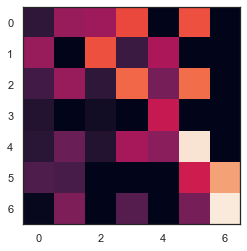

In [52]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()